In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [7]:
def read_image(image_path):
    image = cv2.imread(image_path)
    return image

def display_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def resize_image(image):
    resized_image = cv2.resize(image, (256, 256))
    return resized_image

def plot(image, title):
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    plt.hist(image.ravel(), bins=256, range=[0,256])
    plt.title(title)
    plt.xlabel("Pixel Intensity (0-255)")
    plt.ylabel("Frequency")
    plt.show()

def cudf(image):
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    cdf = hist.cumsum()
    return cdf

def equalize(cdf):
    cdf_normalized = cdf * 255 / cdf[-1]
    return cdf_normalized

In [8]:
def HE_RGB(image_path):
    img = read_image(image_path)
    img_resized = resize_image(img)
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    print("Image Shape:", img_rgb.shape)

    print("Original Image:\n")
    display_image(img_rgb)

    r,g,b = cv2.split(img_rgb)

    print("Original Histograms:\n")
    plot(r, "Red Channel Histogram of Original Image")
    plot(g, "Green Channel Histogram of Original Image")
    plot(b, "Blue Channel Histogram of Original Image")

    cdf_r = cudf(r)
    cdf_norm_r = equalize(cdf_r)
    img_norm_r = cdf_norm_r[r]
    img_norm_r = img_norm_r.reshape(r.shape)

    cdf_g = cudf(g)
    cdf_norm_g = equalize(cdf_g)
    img_norm_g = cdf_norm_g[g]
    img_norm_g = img_norm_g.reshape(g.shape)

    cdf_b = cudf(b)
    cdf_norm_b = equalize(cdf_b)
    img_norm_b = cdf_norm_b[b]
    img_norm_b = img_norm_b.reshape(b.shape)

    img_norm = cv2.merge((img_norm_r, img_norm_g, img_norm_b))

    print("Equalized Image:\n")
    display_image(img_norm.astype(np.uint8))

    r_eq, g_eq, b_eq = cv2.split(img_norm)   

    print("Equalized Histograms:\n")
    plot(r_eq, "Red Channel Histogram of Equalized Image")
    plot(g_eq, "Green Channel Histogram of Equalized Image")
    plot(b_eq, "Blue Channel Histogram of Equalized Image")

    return img_norm.astype(np.uint8)


Processing Image 1: images/sample01.jpg
Image Shape: (256, 256, 3)
Original Image:



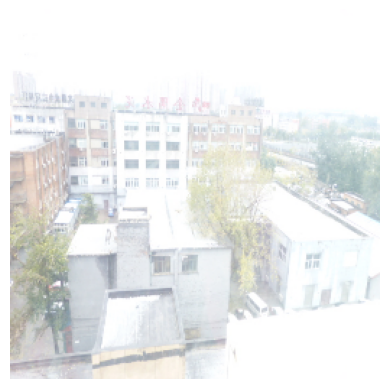

Original Histograms:



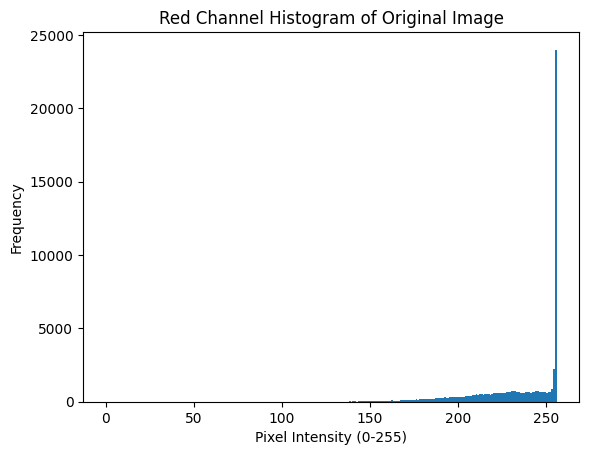

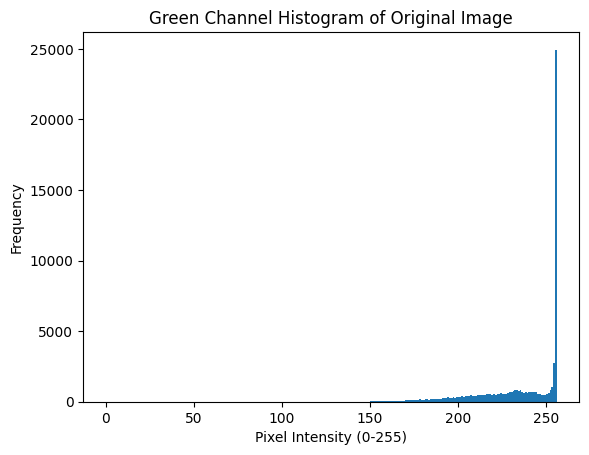

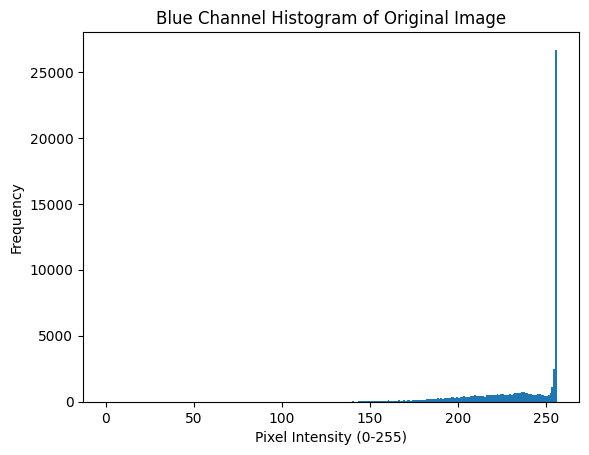

Equalized Image:



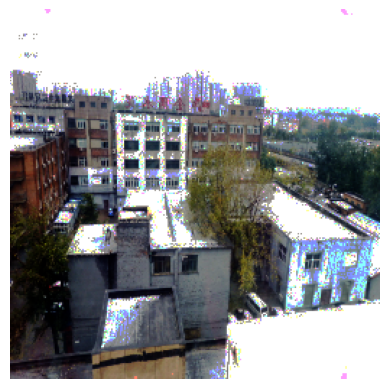

Equalized Histograms:



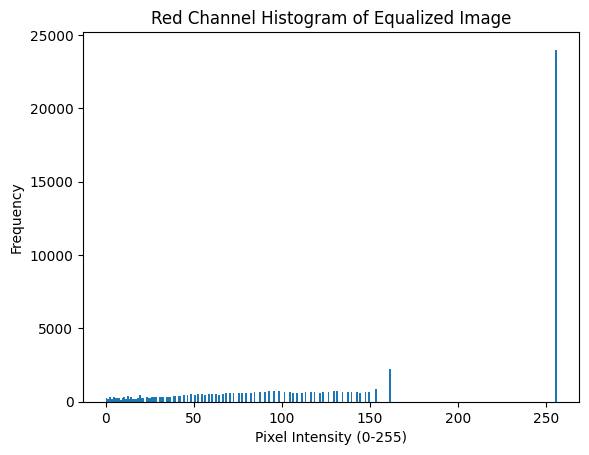

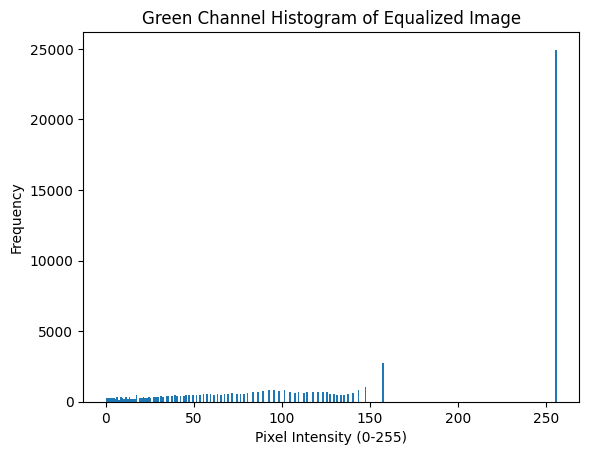

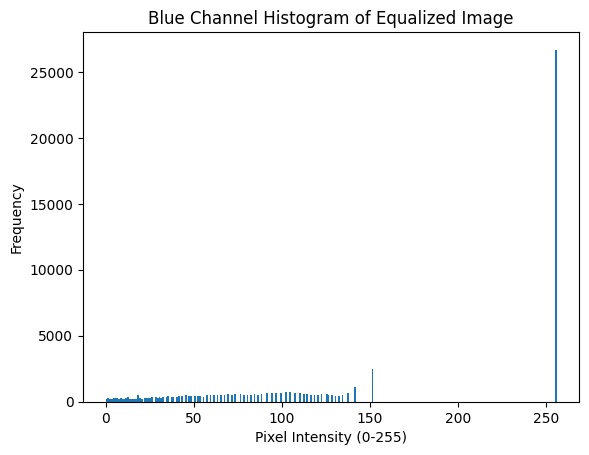

Processed and saved: images/rgb/sample01_rgb.jpg 


Processing Image 2: images/sample02.jpeg
Image Shape: (256, 256, 3)
Original Image:



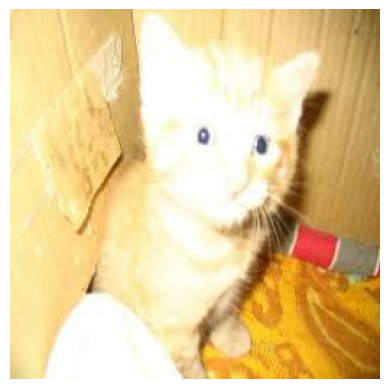

Original Histograms:



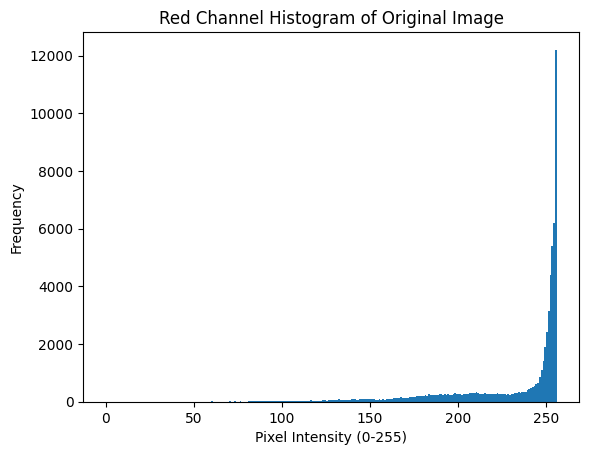

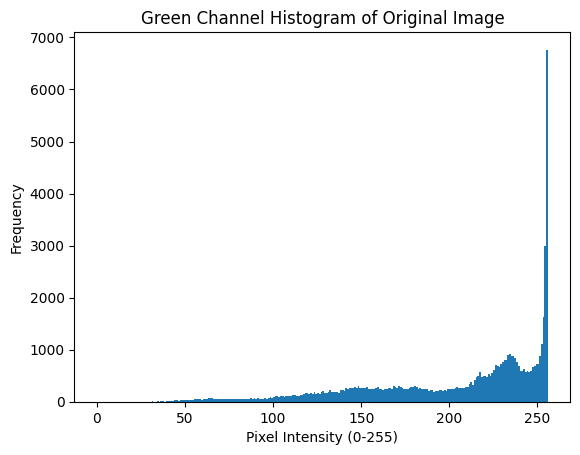

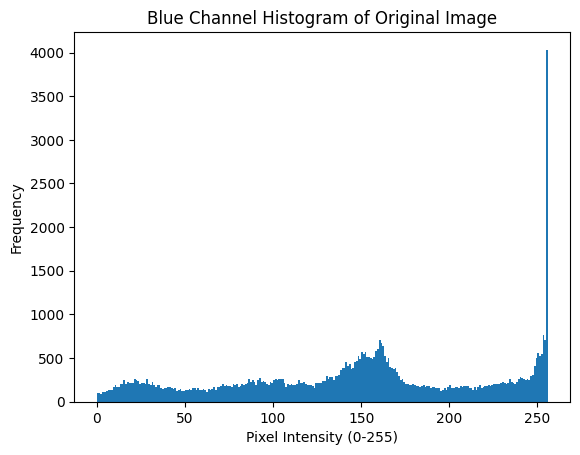

Equalized Image:



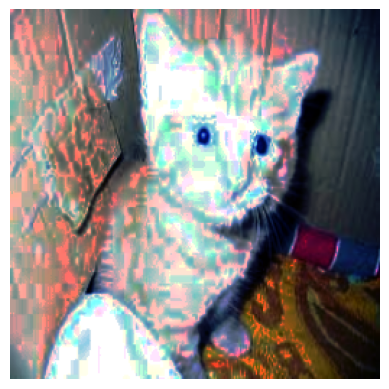

Equalized Histograms:



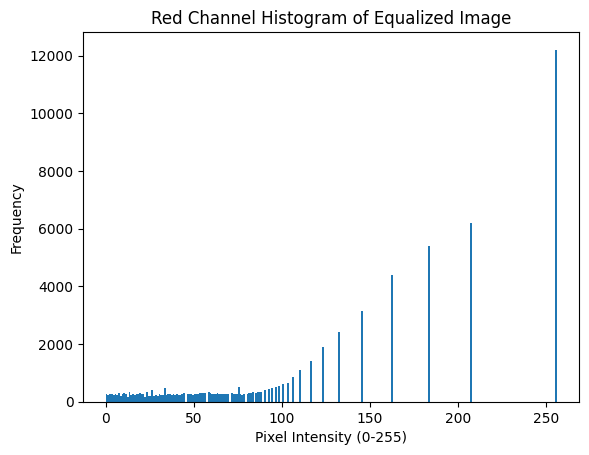

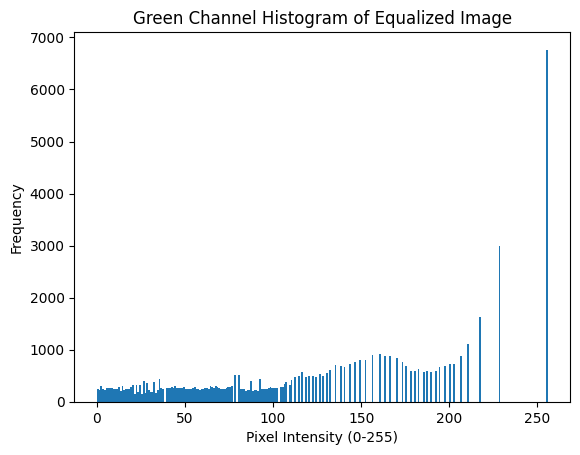

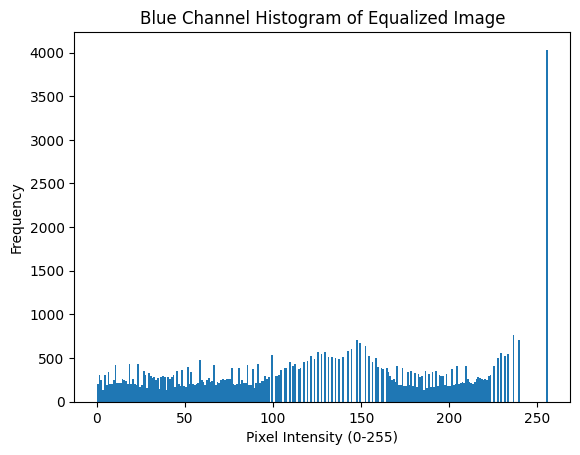

Processed and saved: images/rgb/sample02_rgb.jpeg 


Processing Image 3: images/sample03.jpeg
Image Shape: (256, 256, 3)
Original Image:



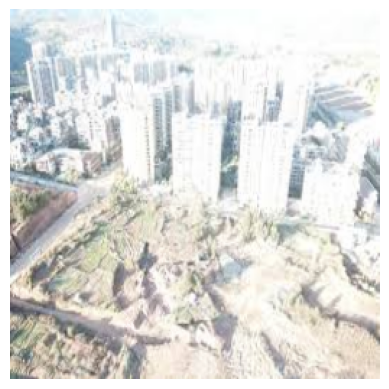

Original Histograms:



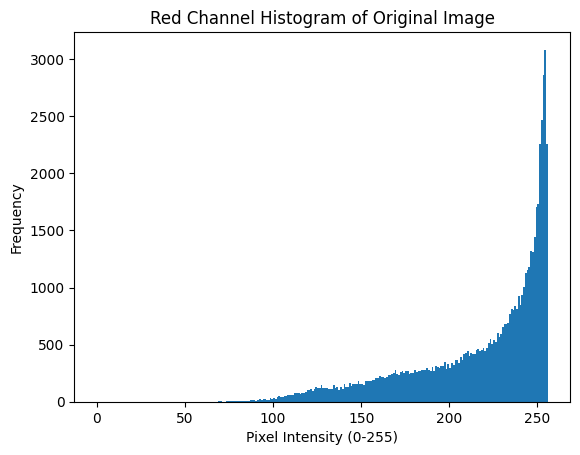

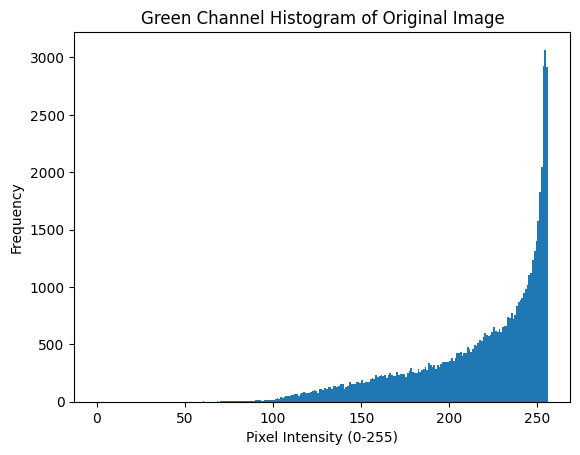

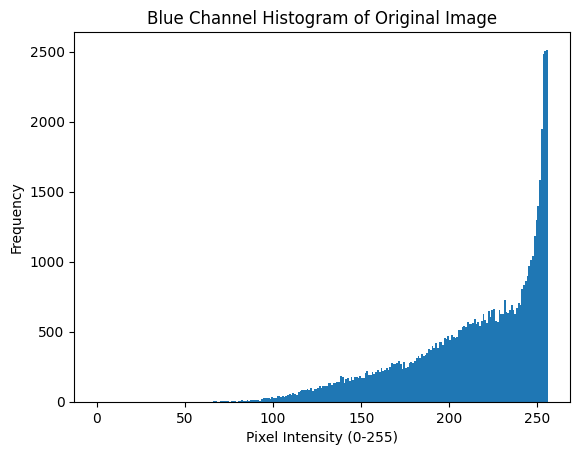

Equalized Image:



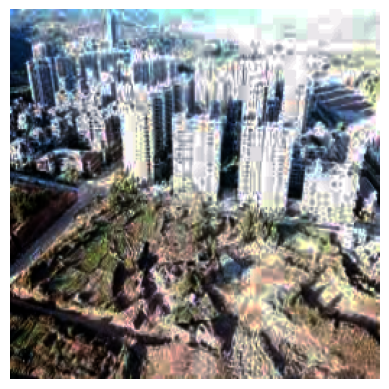

Equalized Histograms:



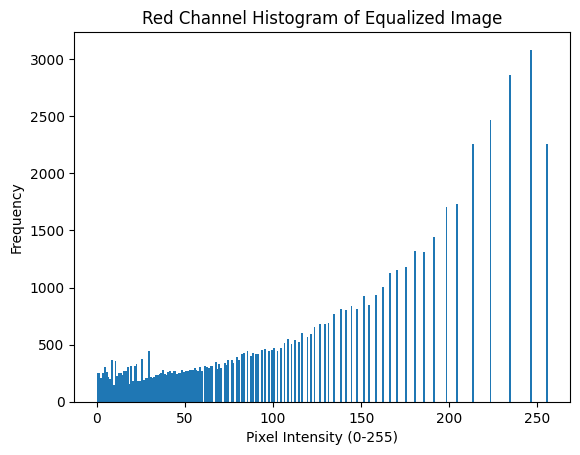

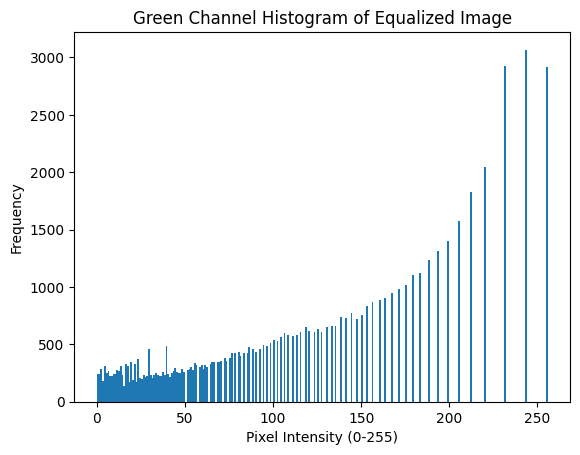

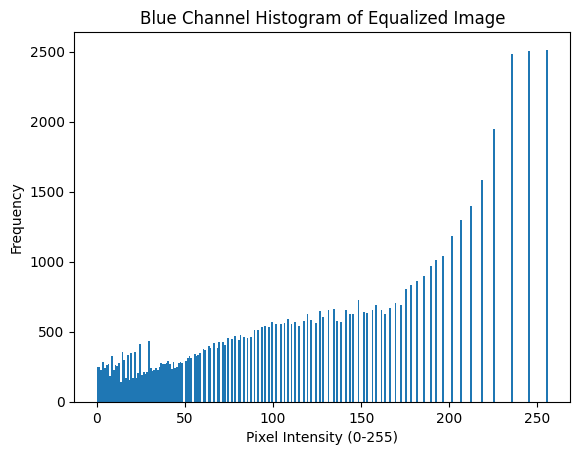

Processed and saved: images/rgb/sample03_rgb.jpeg 


Processing Image 4: images/sample04.jpeg
Image Shape: (256, 256, 3)
Original Image:



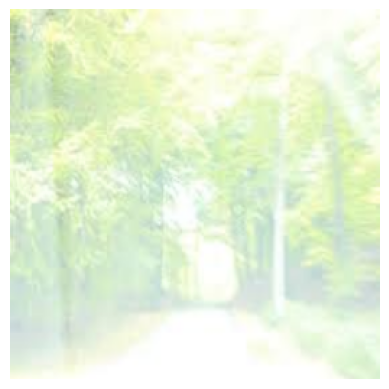

Original Histograms:



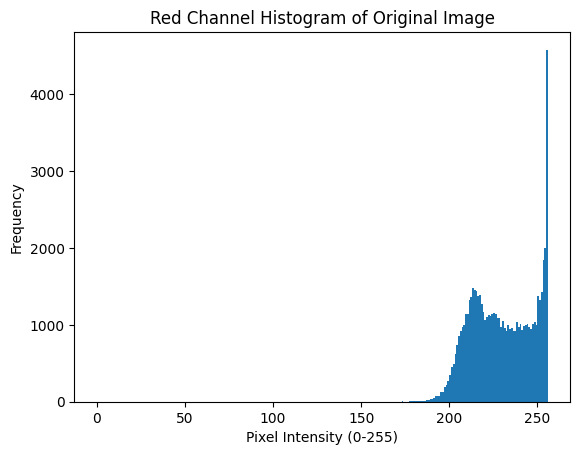

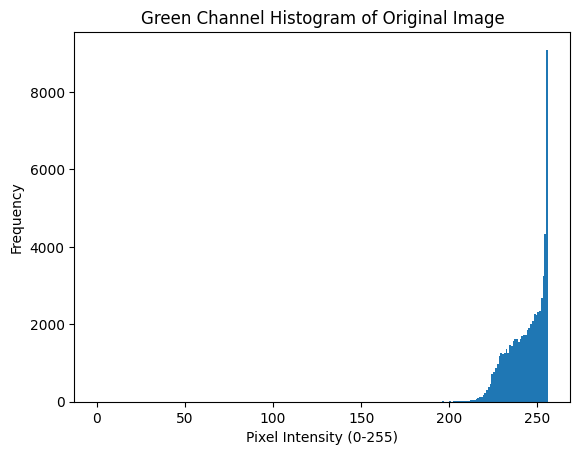

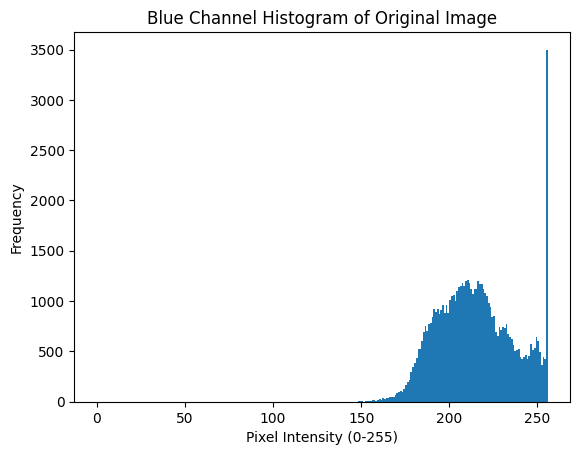

Equalized Image:



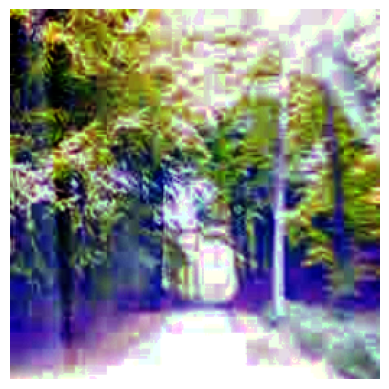

Equalized Histograms:



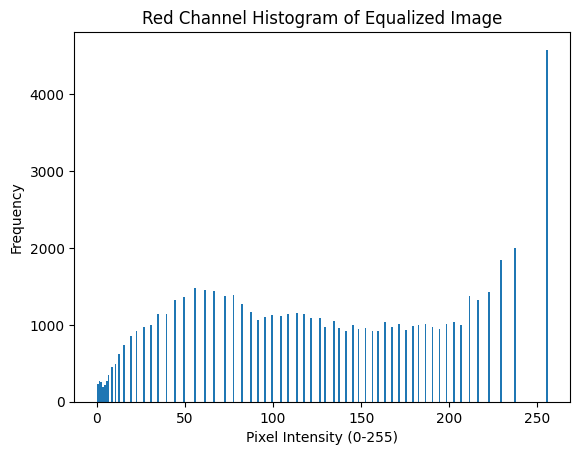

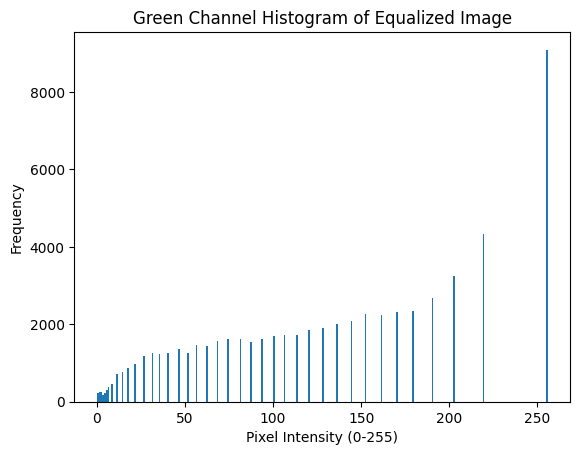

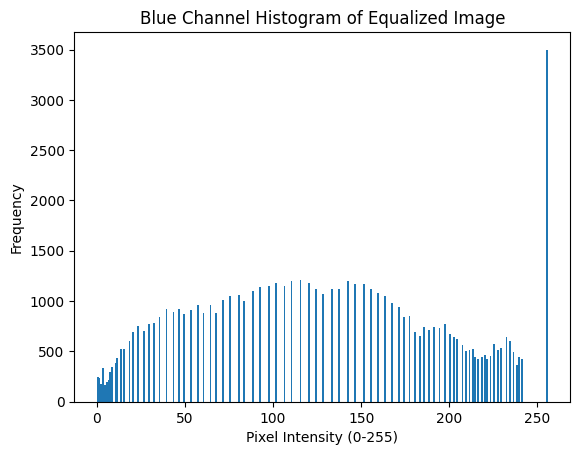

Processed and saved: images/rgb/sample04_rgb.jpeg 


Processing Image 5: images/sample05.jpeg
Image Shape: (256, 256, 3)
Original Image:



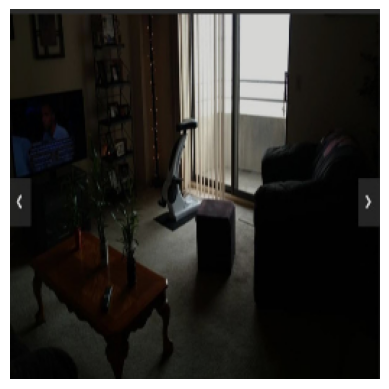

Original Histograms:



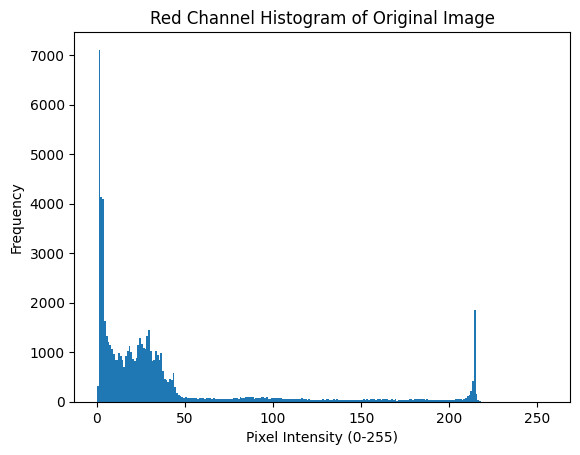

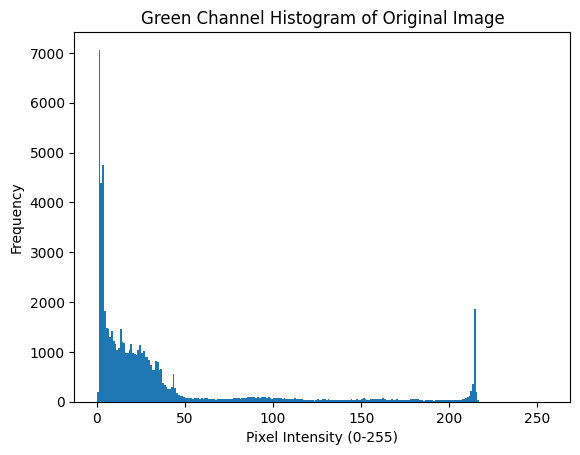

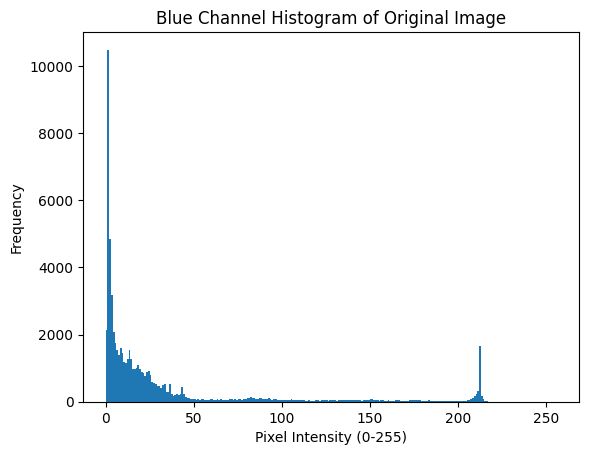

Equalized Image:



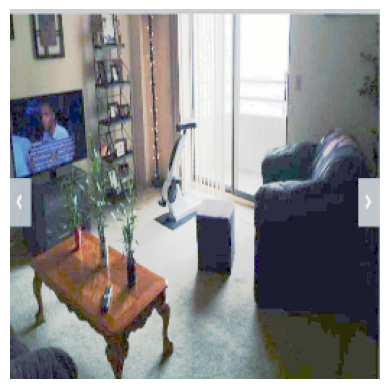

Equalized Histograms:



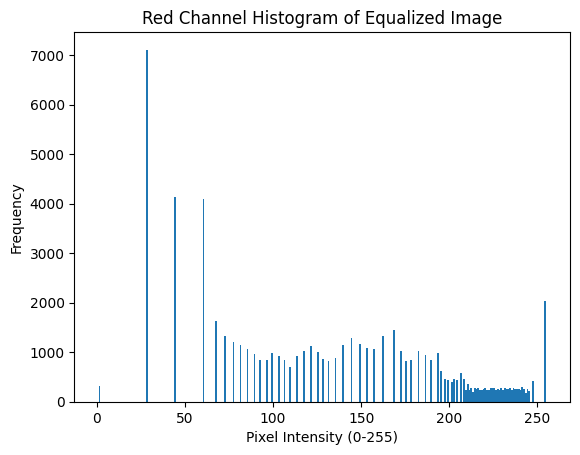

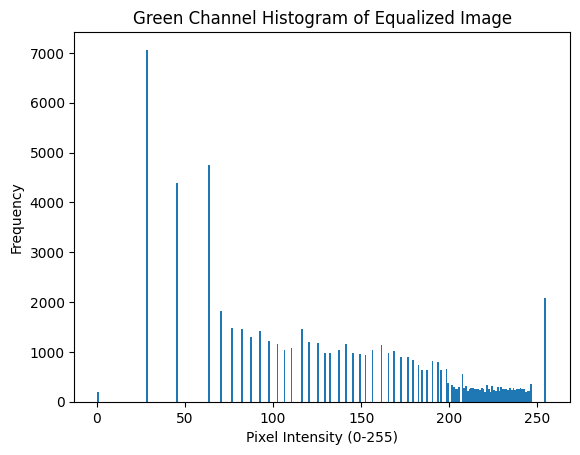

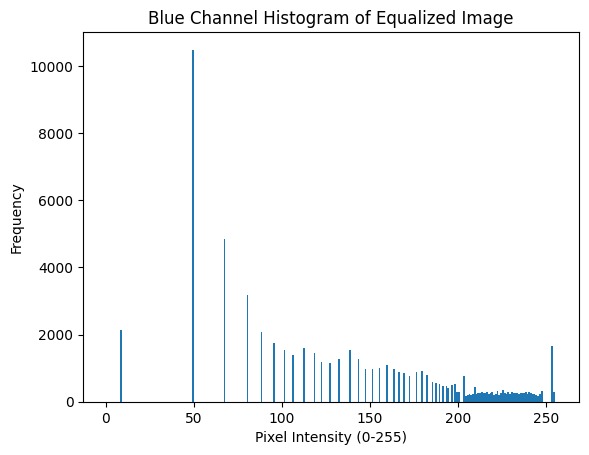

Processed and saved: images/rgb/sample05_rgb.jpeg 


Processing Image 6: images/sample06.jpg
Image Shape: (256, 256, 3)
Original Image:



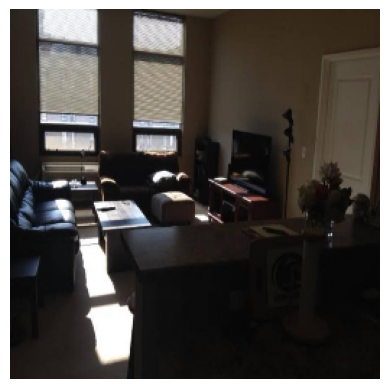

Original Histograms:



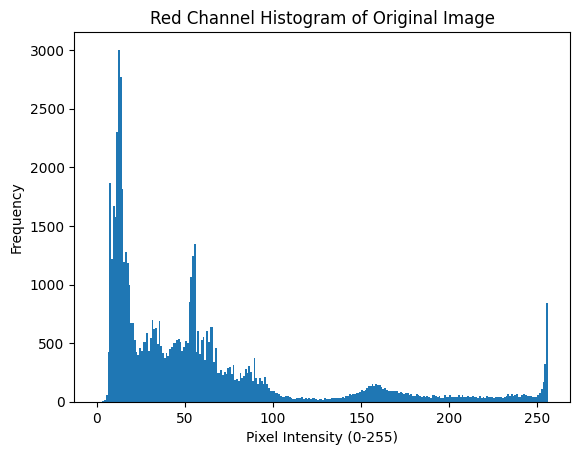

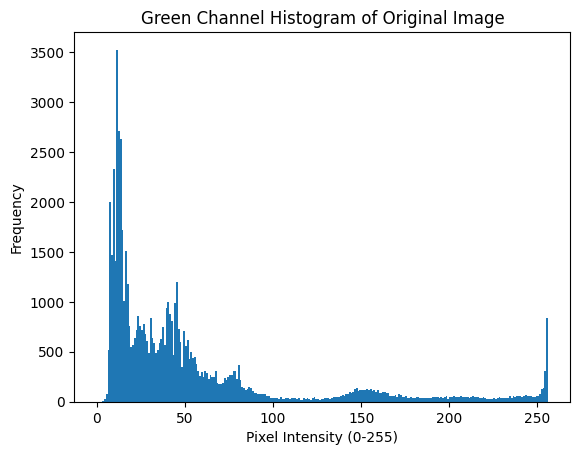

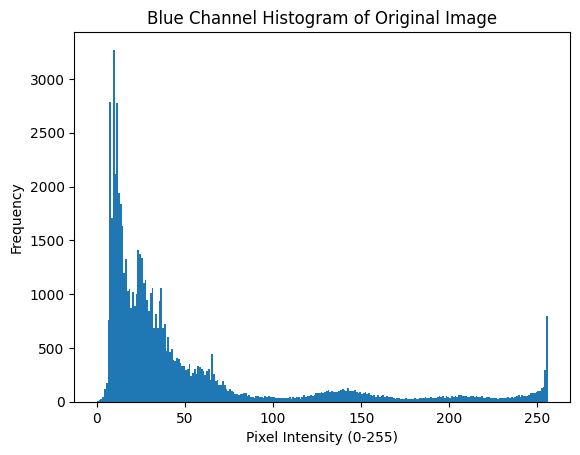

Equalized Image:



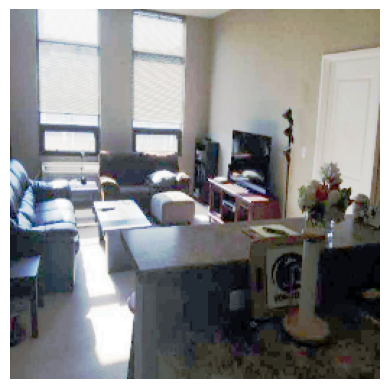

Equalized Histograms:



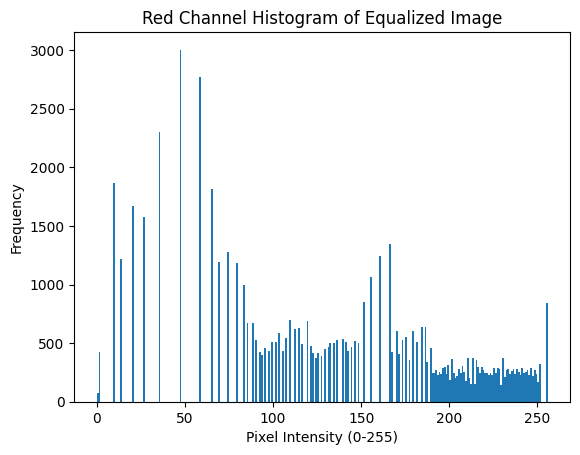

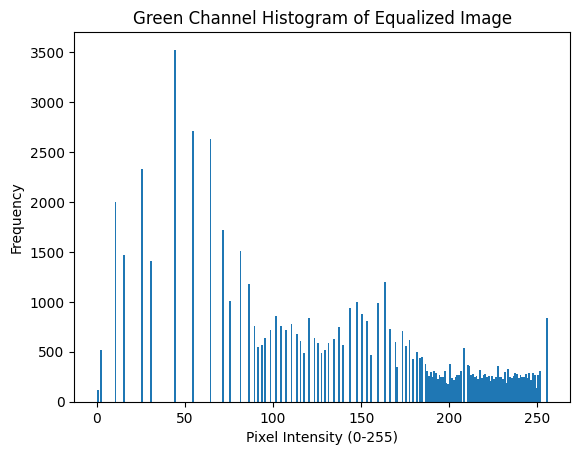

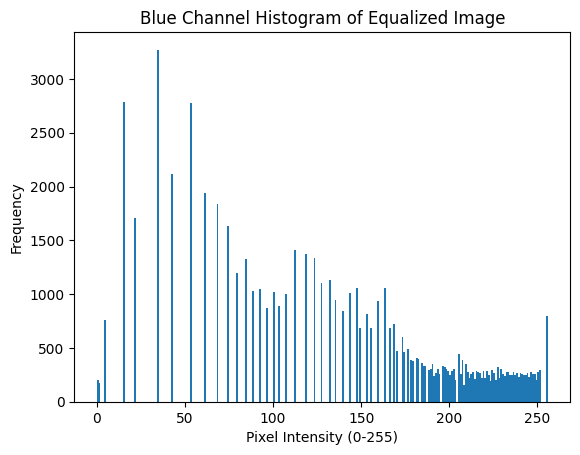

Processed and saved: images/rgb/sample06_rgb.jpg 


Processing Image 7: images/sample07.jpg
Image Shape: (256, 256, 3)
Original Image:



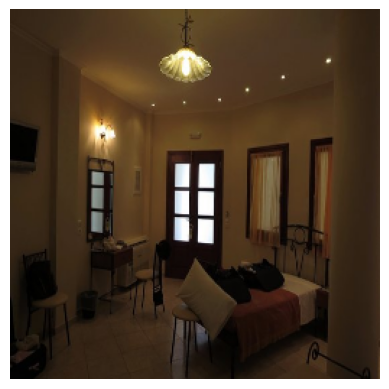

Original Histograms:



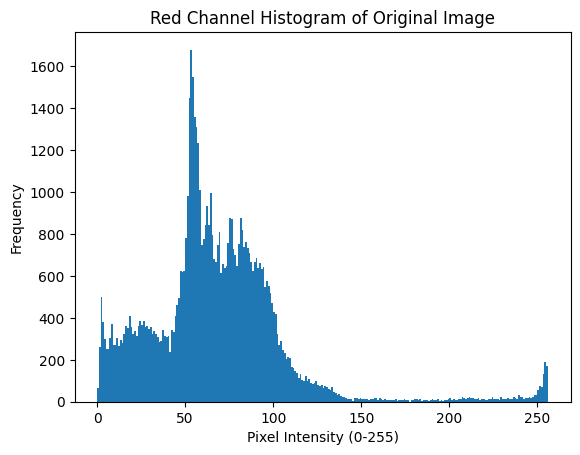

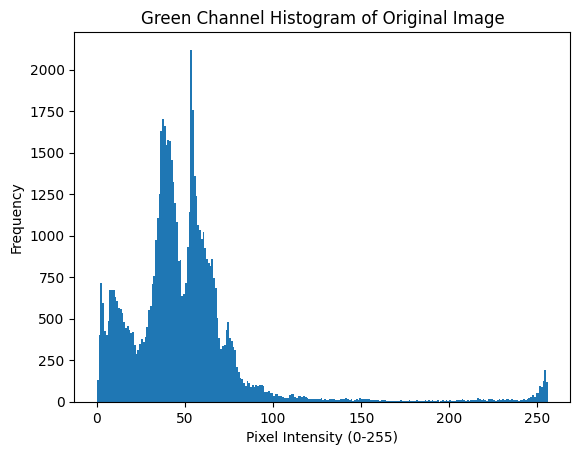

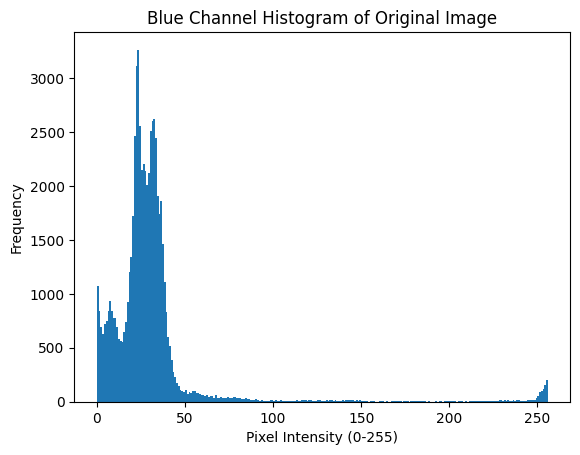

Equalized Image:



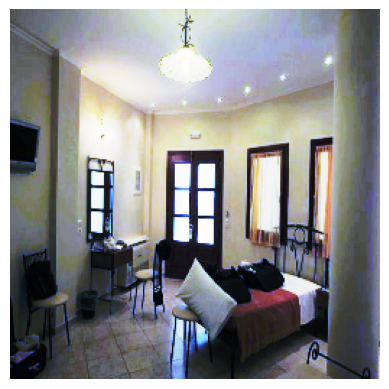

Equalized Histograms:



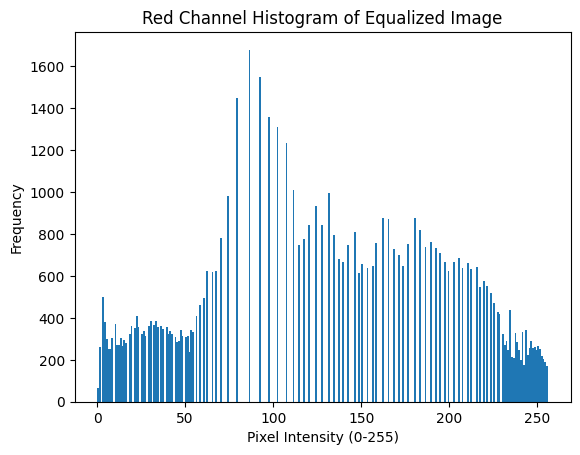

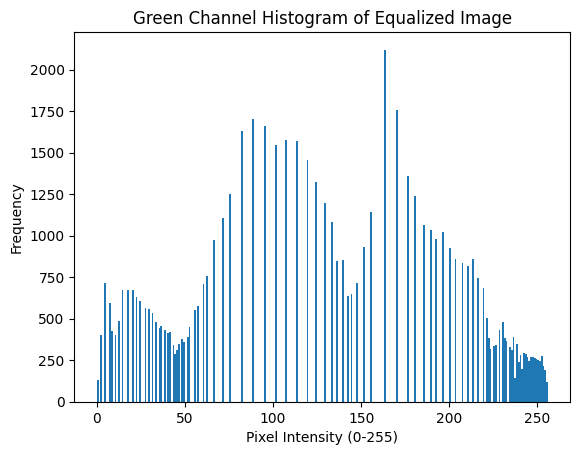

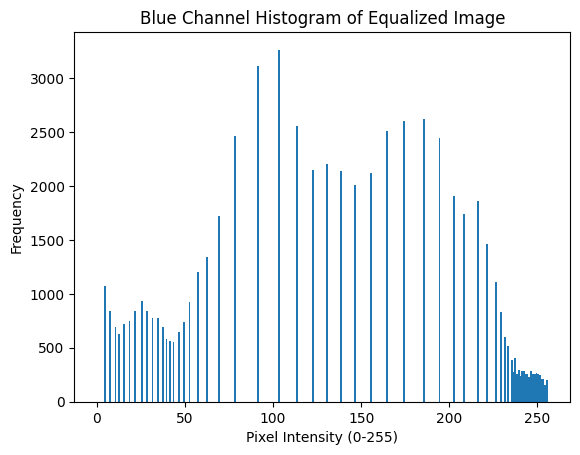

Processed and saved: images/rgb/sample07_rgb.jpg 


Processing Image 8: images/sample08.jpg
Image Shape: (256, 256, 3)
Original Image:



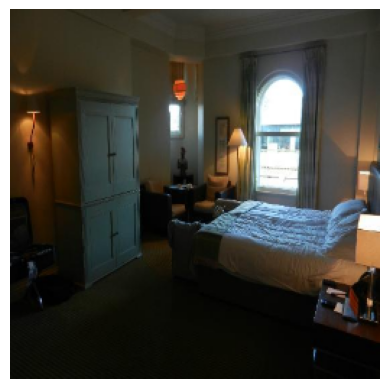

Original Histograms:



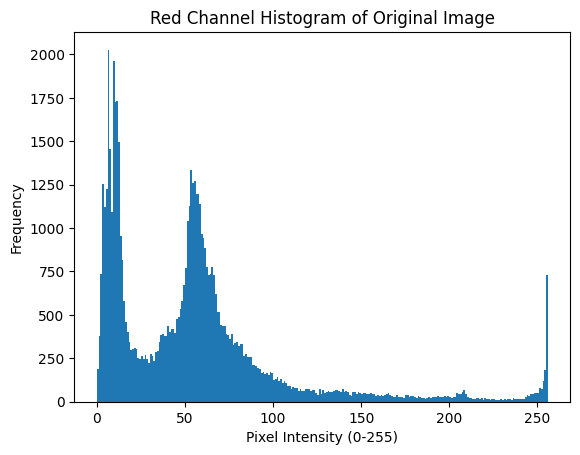

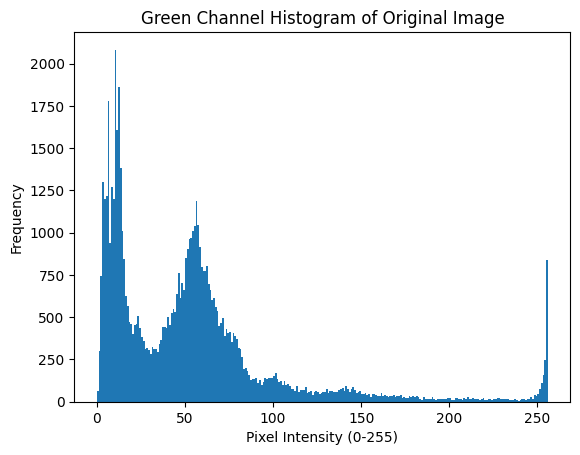

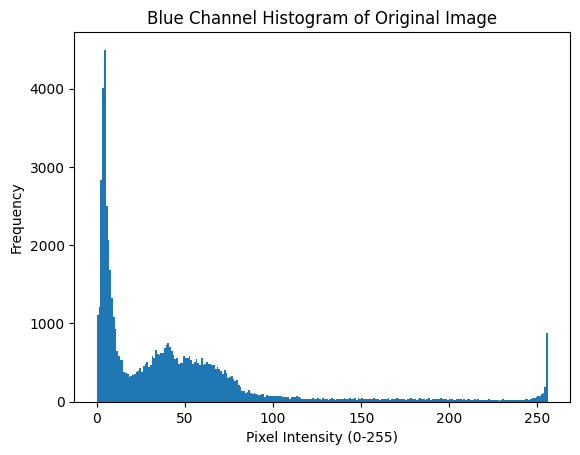

Equalized Image:



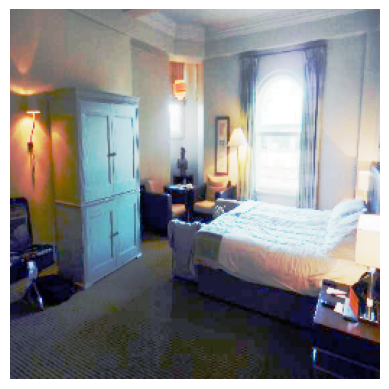

Equalized Histograms:



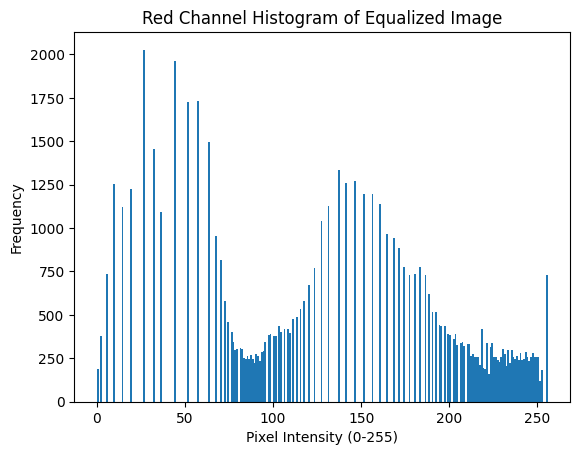

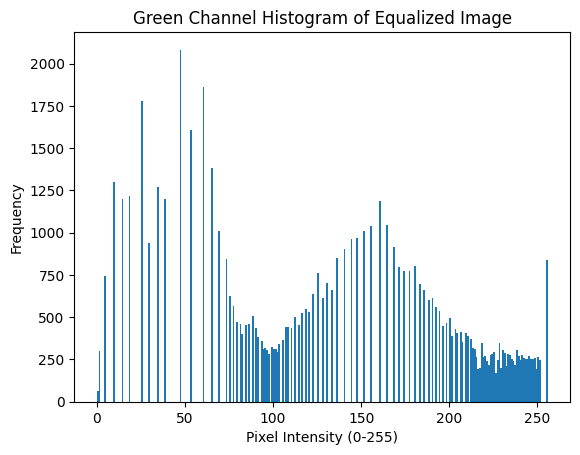

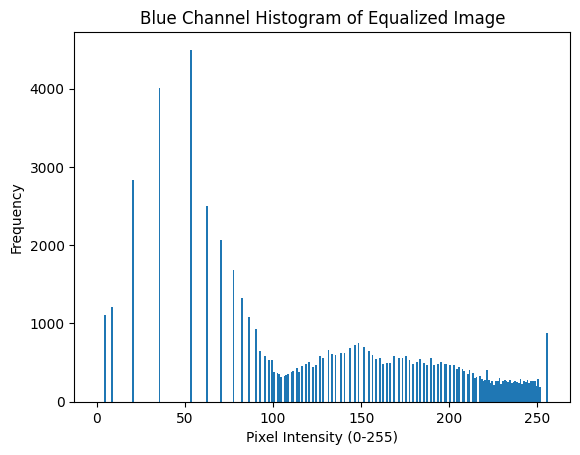

Processed and saved: images/rgb/sample08_rgb.jpg 




In [ ]:
input_folder = "images"
output_folder = "images/rgb"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

i = 1
for filename in os.listdir(input_folder):
    input_path = input_folder + "/" + filename
    if os.path.isfile(input_path):
        try:
            image = cv2.imread(input_path)

            if image is not None:
                print(f"Processing Image {i}: {input_path}")
                processed_image = HE_RGB(input_path)
                

                name, ext = os.path.splitext(filename)
                output_filename = f"{name}_rgb{ext}"
                output_path = output_folder + "/" + output_filename

                cv2.imwrite(output_path, processed_image)
                print(f"Processed and saved: {output_path} \n\n")
                i += 1
            else:
                print(f"Could not read image: {input_path}")
        except Exception as e:
            print(f"An error occurred while processing {filename}: {e}")